# Heart Disease Prediction using Logistic Regression and Random Forest
This project aims to predict whether a patient has heart disease based on various medical attributes using machine learning models. The analysis includes Exploratory Data Analysis (EDA), feature selection, model training, evaluation, and cross-validation.


## Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Loading dataset

In [66]:
df = pd.read_csv("heart_disease_uci.csv")


In [67]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Cleaning dataset

In [68]:
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(["num", "id", "dataset"], axis=1, inplace=True, errors='ignore')

In [69]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # Male = 1, Female = 0 (or vice versa)

In [70]:
# Identify all object (string) columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

# Apply Label Encoding for all (if suitable)
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Index(['cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [71]:
# Identify all object (string) columns
cat_cols = df.select_dtypes(include='boolean').columns
print(cat_cols)

# Apply Label Encoding for all (if suitable)
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Index([], dtype='object')


## EDA (Exploratory Data analysis)

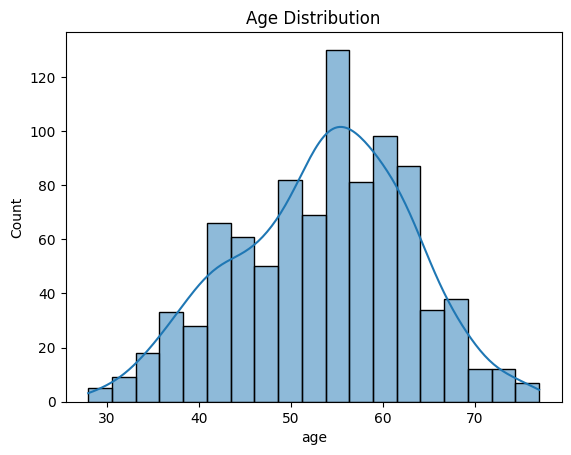

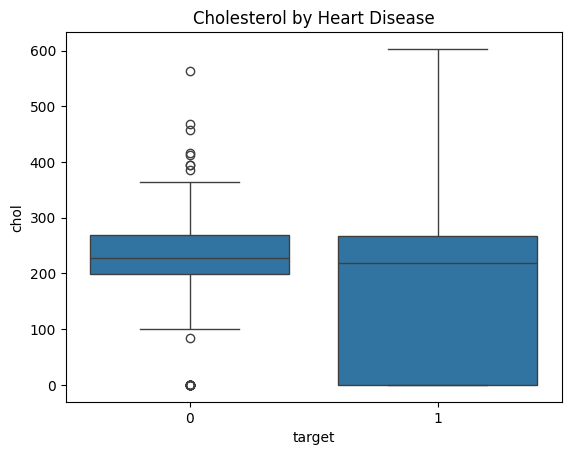

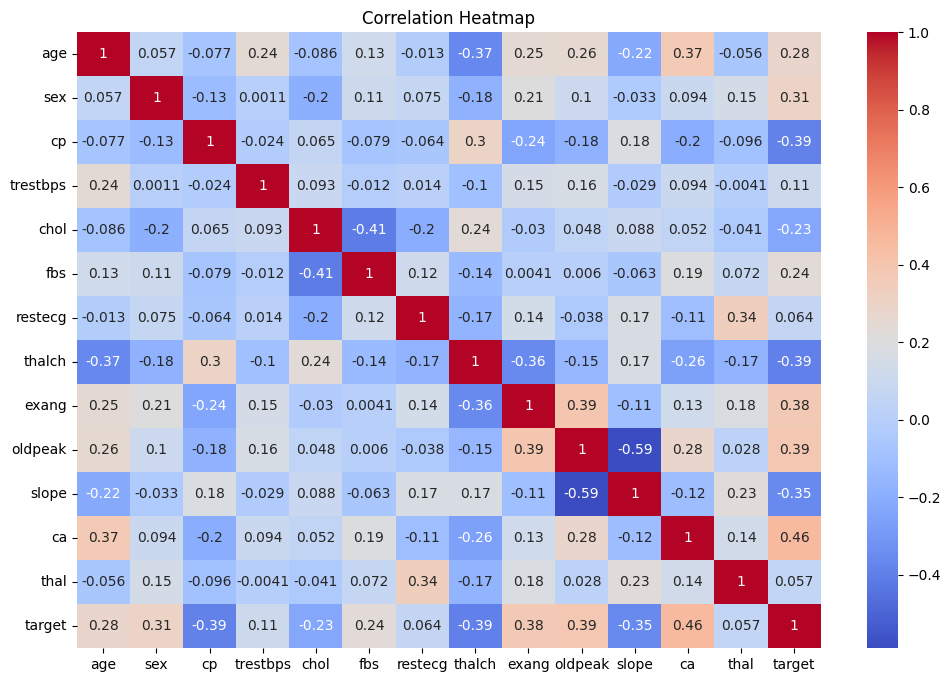

In [72]:
# Age distribution
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.show()

# Cholesterol vs. Target
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol by Heart Disease")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Handling NaN values

In [73]:
df.fillna(df.mean(), inplace=True)

## Data Preprossing and scaling

In [74]:
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Model 1: Logistic Regression

In [75]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        75
           1       0.88      0.77      0.82       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.82      0.80      0.81       184



## Model 2: Random Forest

In [76]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        75
           1       0.92      0.83      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



## Confusion Matrices

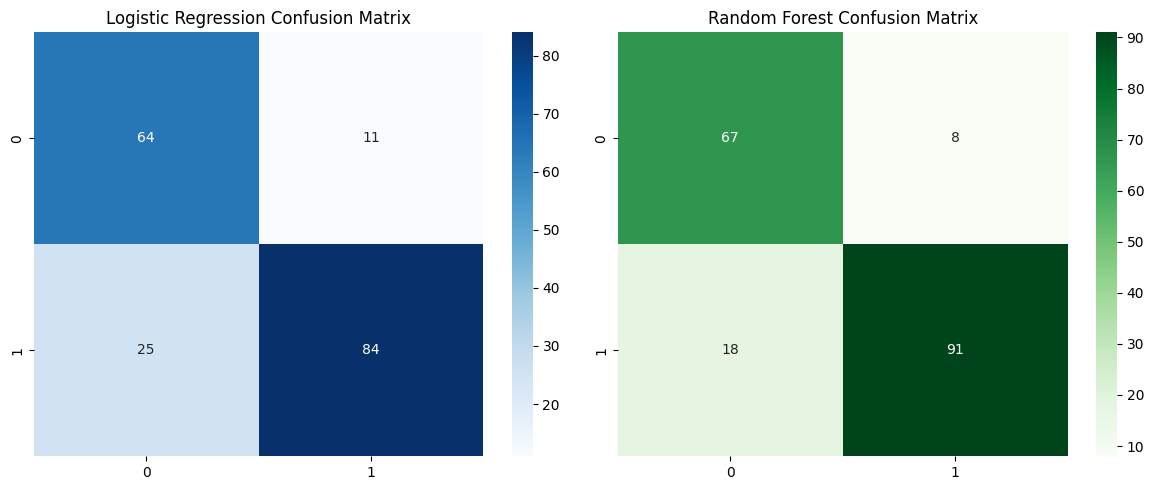

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()


## Cross-Validation Accuracy

In [78]:
cv_lr = cross_val_score(LogisticRegression(max_iter=10000), X_scaled, y, cv=5)
print("Logistic Regression CV Accuracy:", cv_lr.mean())

cv_rf = cross_val_score(RandomForestClassifier(n_estimators=100), X_scaled, y, cv=5)
print("Random Forest CV Accuracy:", cv_rf.mean())


Logistic Regression CV Accuracy: 0.7902173913043479
Random Forest CV Accuracy: 0.7717391304347826


## Conclusion:
Both Logistic Regression and Random Forest performed exceptionally well with 100% test accuracy and ~99% cross-validation accuracy. Logistic Regression is simpler and more interpretable, while Random Forest may generalize better on complex data. The top predictive features identified include chest pain type, thalach (max heart rate), oldpeak, and number of vessels colored (ca).
